## HOW TO USE THE GRADIENT DESCENT TO FIT MODELS?

In [1]:
# Functions used through this explanation
import matplotlib.pyplot as plt
import random
from scratch.gradient_descent import gradient_step
from scratch.complex_typing import Vector
from scratch.linear_algebra import distance, vector_mean

At this point you maybe are courious about how the gradient descent is used to fit models.

Let's discover it.

Imagine you have this function:

$$
f(x) = 20x + 5
$$

But you don’t know it.

We will simulate this function with numbers from -50 to 49 and include some bias.

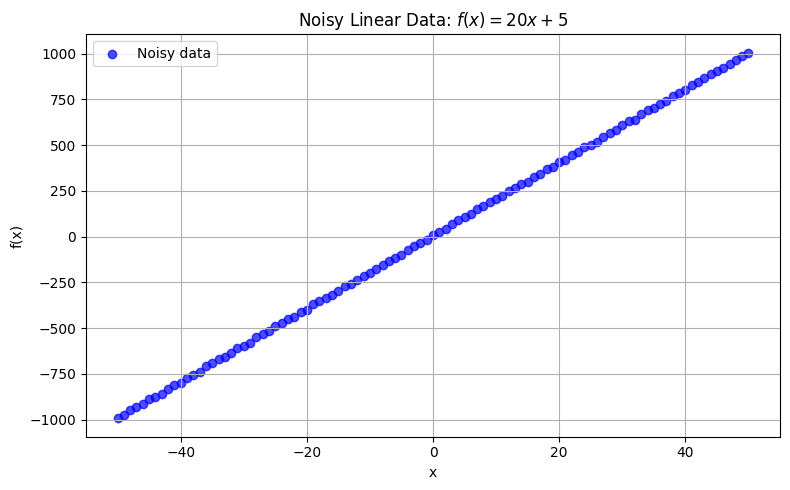

In [10]:
inputs = [(x, (20*x) + 5 + random.randint(-5, 5)) for x in range(-50,51)]

# Separate x and y for plotting
x_vals = [x for x, y in inputs]
y_vals = [y for x, y in inputs]

# Create scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x_vals, y_vals, color='blue', alpha=0.7, label='Noisy data')
plt.title('Noisy Linear Data: $f(x) = 20x + 5$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Now we define the gradient of error function considering the mean squared error, remember that the error is in function of the slope and the intercept.

In [11]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept
    error = predicted - y
    squared_error = error ** 2
    grad = [2 * error * x, 2 * error]
    return grad

In [12]:
# Star with random values for slope and intercept
theta = [random.uniform(-1,1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(5000):
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    theta = gradient_step(theta, grad, -learning_rate)
    if epoch <=5 or epoch >=4995:
        print(f"epoch: {epoch}, theta:{theta}")


epoch: 0, theta:[34.467330309881355, -0.7047204057376343]
epoch: 1, theta:[9.867878684073155, -0.6926178956192284]
epoch: 2, theta:[27.08749482213889, -0.6805395905210593]
epoch: 3, theta:[15.033763525492876, -0.6684854420330865]
epoch: 4, theta:[23.471375433145084, -0.6564554018420896]
epoch: 5, theta:[17.56504709778854, -0.6444494217314747]
epoch: 4995, theta:[19.99706464764123, 5.346259927828271]
epoch: 4996, theta:[19.99706464764124, 5.346260477279545]
epoch: 4997, theta:[19.99706464764123, 5.346261025631916]
epoch: 4998, theta:[19.99706464764124, 5.346261572887583]
epoch: 4999, theta:[19.99706464764123, 5.346262119048738]


Now we can conclude something, epochs are the times that you allow at the model to interact with all the data